   Unnamed: 0  Time Serie AUSTRALIA - AUSTRALIAN DOLLAR/US$  \
0           0  2000-01-03                            1.5172   
1           1  2000-01-04                            1.5239   
2           2  2000-01-05                            1.5267   
3           3  2000-01-06                            1.5291   
4           4  2000-01-07                            1.5272   

  EURO AREA - EURO/US$ NEW ZEALAND - NEW ZELAND DOLLAR/US$  \
0               0.9847                              1.9033   
1                 0.97                              1.9238   
2               0.9676                              1.9339   
3               0.9686                              1.9436   
4               0.9714                               1.938   

  UNITED KINGDOM - UNITED KINGDOM POUND/US$ BRAZIL - REAL/US$  \
0                                    0.6146             1.805   
1                                    0.6109            1.8405   
2                                    0.6092          

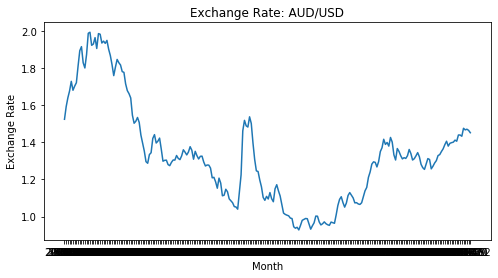

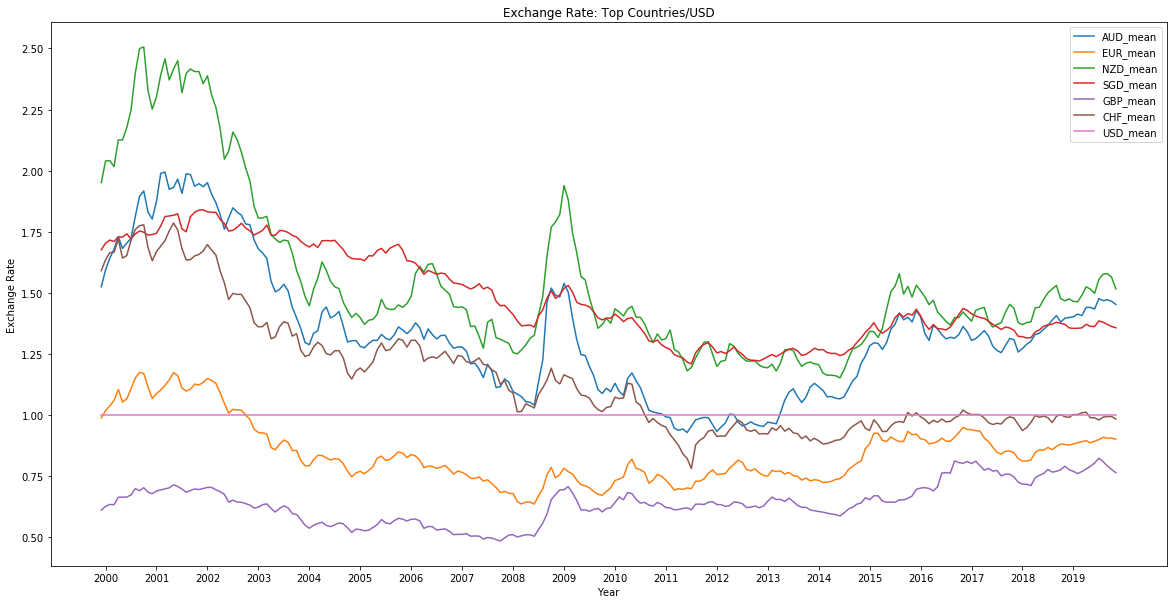

Loading BokehJS ...

      AUD_USD  SGD_USD
0      1.5172   1.6563
1      1.5239   1.6535
2      1.5267   1.6560
3      1.5291   1.6655
4      1.5272   1.6625
...       ...      ...
5010   1.4445   1.3550
5011   1.4411   1.3540
5012   1.4331   1.3520
5013   1.4278   1.3483
5014   1.4225   1.3446

[5015 rows x 2 columns]
118.68650942951783
[[1.1204 1.458 ]
 [1.4749 1.3634]
 [1.8501 1.3923]
 [1.3229 1.6285]
 [0.9639 1.2209]
 [0.9661 1.6708]
 [1.3033 1.3116]
 [1.0937 1.3505]
 [1.4981 1.3145]
 [1.3282 1.3523]
 [1.3635 1.2596]
 [1.1811 1.3878]
 [1.1264 1.4165]
 [1.0609 1.2431]
 [1.4017 1.6929]
 [1.3816 1.223 ]
 [1.071  1.4509]
 [1.9658 1.6282]
 [1.2506 1.8372]
 [1.3319 1.2944]
 [1.2392 1.7372]
 [1.3062 1.2432]
 [1.3495 1.8437]
 [1.3228 1.3622]
 [1.2382 1.3522]
 [1.0658 1.3647]
 [1.7476 1.3748]
 [1.6455 1.4613]
 [1.2718 1.3627]
 [1.9234 1.2031]
 [1.3087 1.3563]
 [1.0634 1.625 ]
 [1.3676 1.3627]
 [1.9004 1.2712]
 [1.3591 1.2537]
 [0.9787 1.3654]
 [1.1053 1.3217]
 [1.0446 1.2605]
 [1.3249 1.3978]
 [0.9661 1.2545]


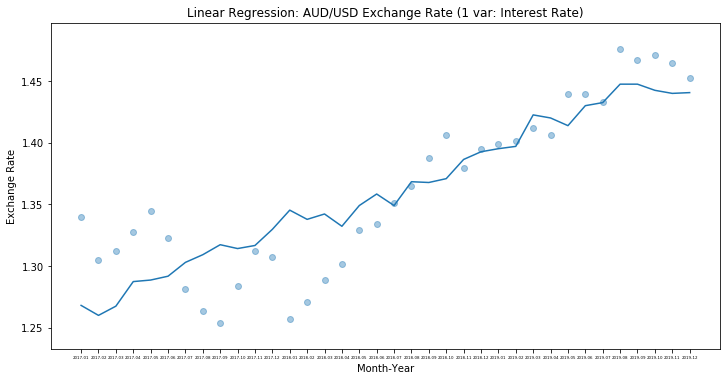

['0.1460', '0.1432', '0.1497', '0.1692', '0.2010', '0.2395', '0.2747', '0.2969', '0.3030', '0.3025', '0.3085', '0.3293', '0.3588', '0.3842', '0.3919', '0.3747', '0.3297', '0.2583', '0.1686', '0.0701', '-0.0283', '-0.1212', '-0.2047', '-0.2754', '-0.3293', '-0.3629', '-0.3751', '-0.3705', '-0.3559', '-0.3377', '-0.3206', '-0.3075', '-0.3003', '-0.2996', '-0.3057', '-0.3182']
0.8720883850071524


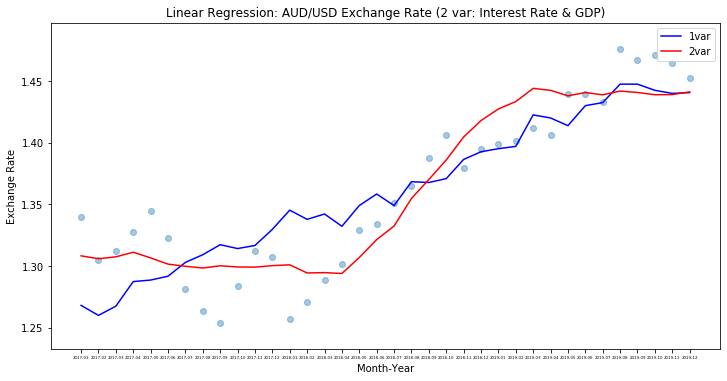

0.8735331474821529


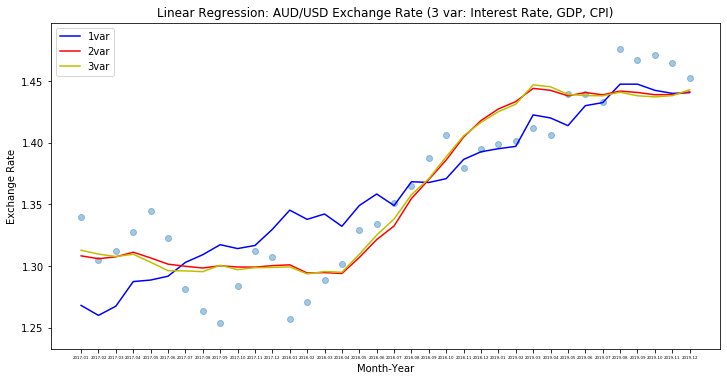

['1.1049', '1.5569', '1.5852', '1.3909', '1.3773', '1.4156', '1.2700', '1.3390', '1.5011', '1.3424', '1.4384', '1.6143', '1.4627', '1.6988', '1.6145', '1.8452', '1.5477', '1.6628', '1.6205', '1.6746', '1.4033', '1.4193', '1.2982', '1.1261', '1.2693', '1.2660', '1.5775', '1.6893', '1.6890', '1.6503', '1.7533', '1.8396', '1.8146', '1.8720', '1.7240', '1.5248']
0.8889382199971628


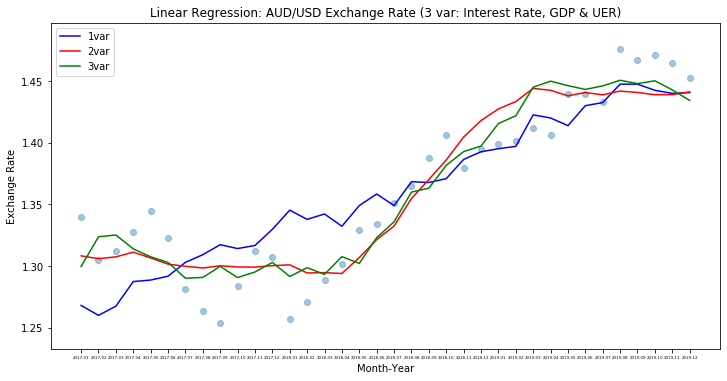

['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-010', '2020-011', '2020-012']
0.9998889832100238


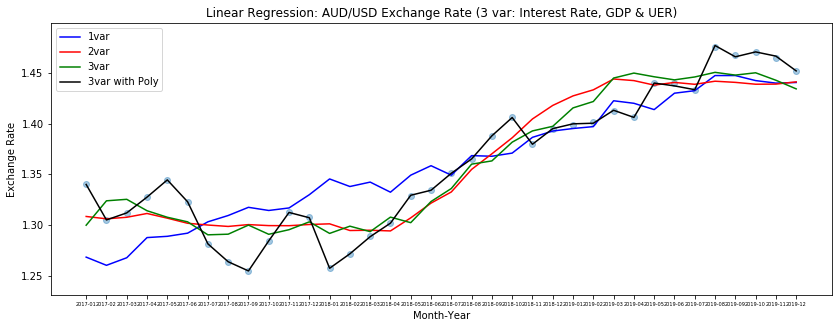

In [1]:
%run exchange-rate-prediction-part2.ipynb

In [2]:
#4. Predict future values using ARIMA model

#Test whether the data is stationary to be able to use ARIMA model or not

from statsmodels.tsa.stattools import adfuller

stat, p, lags, obs, crit, t = adfuller(y_pred)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')

stat=-0.440, p=0.903
Probably not Stationary


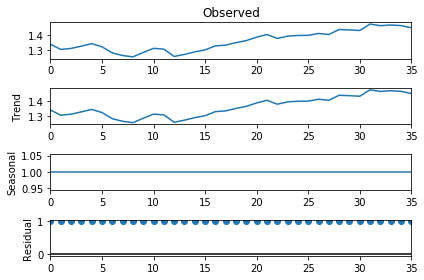

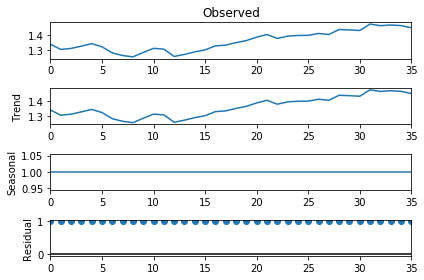

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

y_pred_list = y_pred.tolist()
result = seasonal_decompose(y_pred_list, model='multiplicative', period=1)

result.plot()

In [4]:
date = list(range(1,37))
date_fx = pd.DataFrame(zip(date, y_pred_list), columns=['Date', 'FX'])

In [5]:
#make the data stationary before using AROMA
#apply time shifting by substracting every point by the one that preceded it

date_fx_log = np.log(date_fx)
date_fx_log_diff = date_fx_log - date_fx_log.shift()
date_fx_log_diff.dropna(inplace=True)

y_stationary = date_fx_log_diff.iloc[:,1]
stat, p, lags, obs, crit, t = adfuller(y_stationary )
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')

stat=-5.363, p=0.000
Probably Stationary


In [6]:
from statsmodels.tsa.stattools import acf, pacf

date_fx_log_diff = np.array(date_fx_log_diff).reshape(-1)

lag_acf = acf(date_fx_log_diff, nlags=30)
lag_pacf = pacf(date_fx_log_diff, nlags=30, method='ols')

/opt/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


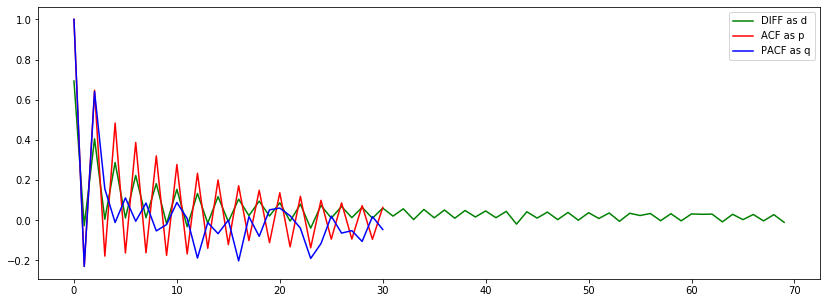

<Figure size 432x288 with 0 Axes>

In [7]:
plt.figure(figsize=(14,5))
plt.plot(date_fx_log_diff, color='g')
plt.plot(lag_acf, color='r')
plt.plot(lag_pacf, color='b')
plt.legend(['DIFF as d','ACF as p', 'PACF as q'])
plt.show()
plt.tight_layout()

                              ARMA Model Results                              
Dep. Variable:                     FX   No. Observations:                   36
Model:                     ARMA(2, 1)   Log Likelihood                  98.988
Method:                       css-mle   S.D. of innovations              0.015
Date:                Mon, 25 May 2020   AIC                           -187.975
Time:                        16:46:02   BIC                           -180.058
Sample:                             0   HQIC                          -185.212
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3194      0.034      9.527      0.000       0.254       0.385
ar.L1.FX       0.3095      0.214      1.445      0.149      -0.110       0.729
ar.L2.FX       0.5852      0.215      2.727      0.0

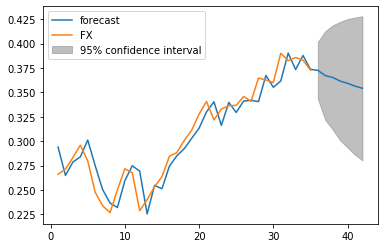

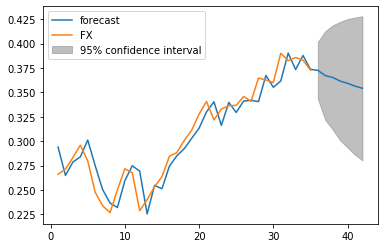

In [8]:
from statsmodels.tsa.arima_model import ARIMA

y = date_fx_log.iloc[:, 1]

model_arima = ARIMA(y, (2,0,1))
model_arima_fit = model_arima.fit(disp=0)
print(model_arima_fit.summary())

pred = model_arima_fit.forecast(12)[0]
print(pred)

model_arima_fit.plot_predict(1,42)

In [9]:
pred = np.exp(pred)

In [10]:
forecast = pred.tolist()

In [11]:
print(forecast)

[1.4515188068169413, 1.443725408764622, 1.4410014513657776, 1.435629535069507, 1.432387337384503, 1.4282604508552414, 1.425099000619457, 1.42171956063234, 1.418834318004802, 1.415973985375698, 1.4134087480789734, 1.4109486530837858]


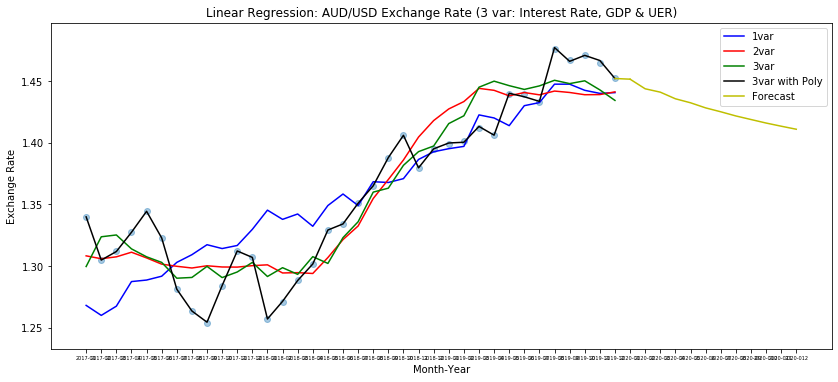

In [12]:
x_merge = ['2019-12', '2020-01']
y_merge = [y_pred[-1], forecast[0]]

plt.figure(figsize=(14,6))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_fx_predict, color='b')
plt.plot(month_year, y_fx_predict_2, color='r')
plt.plot(month_year, y_fx_predict_3, color='g')
plt.plot(month_year, y_pred, color='black')
plt.plot(x_merge, y_merge, color='y')
plt.plot(month_year_future, forecast, color='y')
plt.legend(['1var', '2var', '3var', '3var with Poly', 'Forecast'])
plt.title("Linear Regression: AUD/USD Exchange Rate (3 var: Interest Rate, GDP & UER)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=5)
plt.show()